In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('1ToyotaBattDatacorrected.csv')

In [3]:
p = []
q = []
r = []
for i in range(1008):
    dfk = df[df['cycle'] == (i+1)]
    a = np.percentile(dfk['V'],33)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= a):
            l = dfk.iloc[j,3]
            p.append(dfk.iloc[j,0])
            break
    b = np.percentile(dfk['V'],66)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= b):
            m = dfk.iloc[j,3]
            q.append(dfk.iloc[j,0])
            break
    c = np.percentile(dfk['V'],99)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= c):
            n = dfk.iloc[j,3]
            r.append(dfk.iloc[j,0])
            break

In [4]:
p = np.array(p)
q = np.array(q)
r = np.array(r)
a = r - p
b = r - q
c = q - p

In [5]:
sh = pd.DataFrame({'x':a,'y':b,'z':c})
sh

,x,y,z
0,18.66887,16.2608,2.40807
1,18.75300,16.5190,2.23400
2,18.83200,16.5680,2.26400
3,18.84000,16.6200,2.22000
4,18.90000,16.7800,2.12000
...,...,...,...
1003,7.00000,1.0000,6.00000
1004,8.00000,2.0000,6.00000
1005,6.00000,0.0000,6.00000
1006,7.00000,1.0000,6.00000


In [6]:
s = []
for i in range(1008):
    dfc = df[df['cycle'] == (i+1)]['SoH']
    k = np.mean(dfc)
    s.append(k)
shi = pd.DataFrame({'SoH':s})

In [7]:
data = pd.concat([sh, shi], axis = 1)
data

,x,y,z,SoH
0,18.66887,16.2608,2.40807,0.774642
1,18.75300,16.5190,2.23400,0.773713
2,18.83200,16.5680,2.26400,0.773076
3,18.84000,16.6200,2.22000,0.773143
4,18.90000,16.7800,2.12000,0.772612
...,...,...,...,...
1003,7.00000,1.0000,6.00000,0.655975
1004,8.00000,2.0000,6.00000,0.654306
1005,6.00000,0.0000,6.00000,0.652531
1006,7.00000,1.0000,6.00000,0.652455


In [8]:
s = []
t = []
for i in range(1008):
    dfl = df[df['cycle'] == (i+1)]
    d = np.array(dfl['T']).max()
    e = np.array(dfl['T']).min()
    s.append(d)
    t.append(e)

In [9]:
shiv = pd.DataFrame({'Tmax':s,'Tmin':t})
shiv

,Tmax,Tmin
0,33.434,30.830
1,33.404,30.780
2,33.325,30.825
3,33.304,30.805
4,33.257,30.792
...,...,...
1003,34.830,31.565
1004,34.780,31.424
1005,34.779,31.383
1006,34.766,31.437


In [10]:
data1 = pd.concat([sh, shiv, shi], axis = 1)
data1

,x,y,z,Tmax,Tmin,SoH
0,18.66887,16.2608,2.40807,33.434,30.830,0.774642
1,18.75300,16.5190,2.23400,33.404,30.780,0.773713
2,18.83200,16.5680,2.26400,33.325,30.825,0.773076
3,18.84000,16.6200,2.22000,33.304,30.805,0.773143
4,18.90000,16.7800,2.12000,33.257,30.792,0.772612
...,...,...,...,...,...,...
1003,7.00000,1.0000,6.00000,34.830,31.565,0.655975
1004,8.00000,2.0000,6.00000,34.780,31.424,0.654306
1005,6.00000,0.0000,6.00000,34.779,31.383,0.652531
1006,7.00000,1.0000,6.00000,34.766,31.437,0.652455


In [11]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [12]:
# Separate Target Variable and Predictor Variables
TargetVariable = ['SoH']
Predictors = ['x', 'y', 'z', 'Tmax', 'Tmin']
 
X = data1[Predictors].values
y = data1[TargetVariable].values
 
### Sandardization of data ###
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
  
# Generating the standardized values of X and y
X=Scaler.fit_transform(X)
y=Scaler.fit_transform(y)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Reshape the data for LSTM input
X = X.reshape(1008, 1, 5)

# Define the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(1, X.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=100, batch_size=16, verbose=1, validation_split=0.25)


Epoch 1/100
48/48 [==============================] - 2s 8ms/step - loss: 0.3221 - val_loss: 2.7835
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0847 - val_loss: 2.4513
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0501 - val_loss: 2.3654
Epoch 4/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0463 - val_loss: 2.3224
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0430 - val_loss: 2.2726
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0400 - val_loss: 2.2319
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0373 - val_loss: 2.1774
Epoch 8/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0351 - val_loss: 2.1373
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0334 - val_loss: 2.0978
Epoch 10/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0318 - val_loss: 2.0685
Epoch 11/

48/48 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 0.4725
Epoch 84/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0229 - val_loss: 0.4827
Epoch 85/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.4554
Epoch 86/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.4652
Epoch 87/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0229 - val_loss: 0.4303
Epoch 88/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.4224
Epoch 89/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 0.4200
Epoch 90/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 0.3971
Epoch 91/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0229 - val_loss: 0.3976
Epoch 92/100
48/48 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.3886
Epoch 93/100


## Testing1

In [14]:
df = pd.read_csv('2ToyotaBattDatacorrected.csv')

In [15]:
p = []
q = []
r = []
for i in range(1062):
    dfk = df[df['cycle'] == (i+1)]
    a = np.percentile(dfk['V'],33)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= a):
            l = dfk.iloc[j,3]
            p.append(dfk.iloc[j,0])
            break
    b = np.percentile(dfk['V'],66)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= b):
            m = dfk.iloc[j,3]
            q.append(dfk.iloc[j,0])
            break
    c = np.percentile(dfk['V'],99)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= c):
            n = dfk.iloc[j,3]
            r.append(dfk.iloc[j,0])
            break

In [16]:
p = np.array(p)
q = np.array(q)
r = np.array(r)
a = r - p
b = r - q
c = q - p

In [17]:
sh = pd.DataFrame({'x':a,'y':b,'z':c})
sh

,x,y,z
0,18.59124,16.5888,2.00244
1,18.68200,16.7710,1.91100
2,18.75300,16.8820,1.87100
3,18.83000,16.9400,1.89000
4,18.84000,16.9400,1.90000
...,...,...,...
1057,5.00000,0.0000,5.00000
1058,8.00000,2.0000,6.00000
1059,8.00000,3.0000,5.00000
1060,6.00000,0.0000,6.00000


In [18]:
s = []
for i in range(1062):
    dfc = df[df['cycle'] == (i+1)]['SoH']
    k = np.mean(dfc)
    s.append(k)
shi = pd.DataFrame({'SoH':s})

In [19]:
data = pd.concat([sh, shi], axis = 1)
data

,x,y,z,SoH
0,18.59124,16.5888,2.00244,0.771878
1,18.68200,16.7710,1.91100,0.770172
2,18.75300,16.8820,1.87100,0.772702
3,18.83000,16.9400,1.89000,0.771302
4,18.84000,16.9400,1.90000,0.771043
...,...,...,...,...
1057,5.00000,0.0000,5.00000,0.657630
1058,8.00000,2.0000,6.00000,0.656144
1059,8.00000,3.0000,5.00000,0.656036
1060,6.00000,0.0000,6.00000,0.658288


In [20]:
s = []
t = []
for i in range(1062):
    dfl = df[df['cycle'] == (i+1)]
    d = np.array(dfl['T']).max()
    e = np.array(dfl['T']).min()
    s.append(d)
    t.append(e)

In [21]:
shiv = pd.DataFrame({'Tmax':s,'Tmin':t})
shiv

,Tmax,Tmin
0,37.750,31.447
1,37.733,31.473
2,37.692,31.455
3,37.639,31.400
4,37.612,31.397
...,...,...
1057,40.807,33.319
1058,40.898,33.360
1059,40.850,33.226
1060,40.801,33.144


In [22]:
data1 = pd.concat([sh, shiv, shi], axis = 1)
data1

,x,y,z,Tmax,Tmin,SoH
0,18.59124,16.5888,2.00244,37.750,31.447,0.771878
1,18.68200,16.7710,1.91100,37.733,31.473,0.770172
2,18.75300,16.8820,1.87100,37.692,31.455,0.772702
3,18.83000,16.9400,1.89000,37.639,31.400,0.771302
4,18.84000,16.9400,1.90000,37.612,31.397,0.771043
...,...,...,...,...,...,...
1057,5.00000,0.0000,5.00000,40.807,33.319,0.657630
1058,8.00000,2.0000,6.00000,40.898,33.360,0.656144
1059,8.00000,3.0000,5.00000,40.850,33.226,0.656036
1060,6.00000,0.0000,6.00000,40.801,33.144,0.658288


In [23]:
# Separate Target Variable and Predictor Variables
TargetVariable = ['SoH']
Predictors = ['x', 'y', 'z', 'Tmax', 'Tmin']
 
X1 = data1[Predictors].values
y1 = data1[TargetVariable].values
 
### Sandardization of data ###
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
  
# Generating the standardized values of X and y
X1=Scaler.fit_transform(X1)
y1=Scaler.fit_transform(y1)
X1 = X1.reshape(1062, 1, 5)

In [24]:
# Evaluate the model
score = model.evaluate(X1, y1, batch_size=16)
print('Test loss:', score)

67/67 [==============================] - 0s 799us/step - loss: 0.0627
Test loss: 0.0627179816365242


In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X1)
y_pred = Scaler.inverse_transform(y_pred)
y1 = Scaler.inverse_transform(y1)


# Calculate the RMSE
rmse1 = np.sqrt(mean_squared_error(y1, y_pred))

# Calculate the percentage of RMSE
rmspe1 = np.sqrt(np.mean(np.square(((y1 - y_pred) / y1)), axis=0))
# Print the results
print('RMSE:', rmse1)
print('Percentage of RMSE:', rmspe1, '%')
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y1, y_pred)
print('MAE:', mae1)


34/34 [==============================] - 0s 943us/step
RMSE: 0.006991293635254882
Percentage of RMSE: [0.00981527] %
MAE: 0.005296842318357222


RMSE: 0.006991293635254882
Percentage of RMSE: [0.00981527] %
MAE: 0.005296842318357222


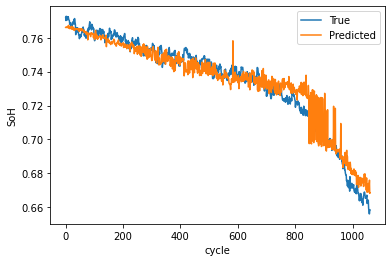

In [26]:
plt.plot(y1)
plt.plot(y_pred)
plt.xlabel('cycle')
plt.ylabel('SoH')
print('RMSE:', rmse1)
print('Percentage of RMSE:', rmspe1, '%')
print('MAE:', mae1)
plt.legend(['True','Predicted'])

In [27]:
graphs = pd.DataFrame(data = y_pred, columns = ['test1'])
graphs['test1'] = graphs['test1'] + 0.2
graphs['test11'] = y1 + 0.2
graphs.to_csv('Graphs1.csv')

## Testing2

In [28]:
df = pd.read_csv('3ToyotaBattDatacorrected.csv')

In [29]:
df

,time,Qc,I,V,T,Qd,cycle,SoH
0,0.000370,0.000002,0.60284,2.1237,35.738,3.000000e-07,1,0.000002
1,0.000810,0.000002,0.88489,2.1484,35.738,3.000000e-07,1,0.000002
2,0.001347,0.000002,1.16260,2.1780,35.738,3.000000e-07,1,0.000002
3,0.001705,0.000002,1.34300,2.2033,35.738,3.000000e-07,1,0.000002
4,0.002238,0.000002,1.67960,2.2460,35.738,3.000000e-07,1,0.000002
...,...,...,...,...,...,...,...,...
919576,50826.000000,0.880250,0.00000,2.0274,39.822,8.801300e-01,1266,0.800230
919577,50826.000000,0.880250,0.00000,2.0481,39.804,8.801300e-01,1266,0.800230
919578,50826.000000,0.880250,0.00000,2.0663,39.785,8.801300e-01,1266,0.800230
919579,50826.000000,0.880250,0.00000,2.0827,39.766,8.801300e-01,1266,0.800230


In [30]:
p = []
q = []
r = []
for i in range(1266):
    dfk = df[df['cycle'] == (i+1)]
    a = np.percentile(dfk['V'],33)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= a):
            l = dfk.iloc[j,3]
            p.append(dfk.iloc[j,0])
            break
    b = np.percentile(dfk['V'],66)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= b):
            m = dfk.iloc[j,3]
            q.append(dfk.iloc[j,0])
            break
    c = np.percentile(dfk['V'],100)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= c):
            n = dfk.iloc[j,3]
            r.append(dfk.iloc[j,0])
            break

In [31]:
p = np.array(p)
q = np.array(q)
r = np.array(r)
a = r - p
b = r - q
c = q - p

In [32]:
sh = pd.DataFrame({'x':a,'y':b,'z':c})
sh

,x,y,z
0,18.49838,17.0459,1.45248
1,18.57500,17.0490,1.52600
2,18.57800,17.1210,1.45700
3,18.65000,17.1800,1.47000
4,18.67000,17.2300,1.44000
...,...,...,...
1261,8.00000,0.0000,8.00000
1262,9.00000,1.0000,8.00000
1263,8.00000,0.0000,8.00000
1264,8.00000,0.0000,8.00000


In [33]:
s = []
for i in range(1266):
    dfc = df[df['cycle'] == (i+1)]['SoH']
    k = np.mean(dfc)
    s.append(k)
shi = pd.DataFrame({'SoH':s})

In [34]:
data = pd.concat([sh, shi], axis = 1)
data

,x,y,z,SoH
0,18.49838,17.0459,1.45248,0.755957
1,18.57500,17.0490,1.52600,0.757946
2,18.57800,17.1210,1.45700,0.755116
3,18.65000,17.1800,1.47000,0.754085
4,18.67000,17.2300,1.44000,0.753356
...,...,...,...,...
1261,8.00000,0.0000,8.00000,0.650090
1262,9.00000,1.0000,8.00000,0.649927
1263,8.00000,0.0000,8.00000,0.651280
1264,8.00000,0.0000,8.00000,0.652293


In [35]:
s = []
t = []
for i in range(1266):
    dfl = df[df['cycle'] == (i+1)]
    d = np.array(dfl['T']).max()
    e = np.array(dfl['T']).min()
    s.append(d)
    t.append(e)

In [36]:
shiv = pd.DataFrame({'Tmax':s,'Tmin':t})
shiv

,Tmax,Tmin
0,39.714,32.140
1,39.498,32.143
2,39.613,32.060
3,39.766,32.107
4,39.737,32.014
...,...,...
1261,43.775,36.136
1262,43.715,35.843
1263,43.870,35.617
1264,43.775,35.414


In [37]:
data1 = pd.concat([sh, shiv, shi], axis = 1)
data1

,x,y,z,Tmax,Tmin,SoH
0,18.49838,17.0459,1.45248,39.714,32.140,0.755957
1,18.57500,17.0490,1.52600,39.498,32.143,0.757946
2,18.57800,17.1210,1.45700,39.613,32.060,0.755116
3,18.65000,17.1800,1.47000,39.766,32.107,0.754085
4,18.67000,17.2300,1.44000,39.737,32.014,0.753356
...,...,...,...,...,...,...
1261,8.00000,0.0000,8.00000,43.775,36.136,0.650090
1262,9.00000,1.0000,8.00000,43.715,35.843,0.649927
1263,8.00000,0.0000,8.00000,43.870,35.617,0.651280
1264,8.00000,0.0000,8.00000,43.775,35.414,0.652293


In [38]:
# Separate Target Variable and Predictor Variables
TargetVariable = ['SoH']
Predictors = ['x', 'y', 'z', 'Tmax', 'Tmin']
 
X2 = data1[Predictors].values
y2 = data1[TargetVariable].values
 
### Sandardization of data ###
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
  
# Generating the standardized values of X and y
X2=Scaler.fit_transform(X2)
y2=Scaler.fit_transform(y2)
X2 = X2.reshape(1266, 1, 5)

In [39]:
# Evaluate the model
score = model.evaluate(X2, y2, batch_size=16)
print('Test loss:', score)

80/80 [==============================] - 0s 777us/step - loss: 0.1995
Test loss: 0.19948823750019073


In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X2)
y_pred = Scaler.inverse_transform(y_pred)
y2 = Scaler.inverse_transform(y2)


# Calculate the RMSE
rmse2 = np.sqrt(mean_squared_error(y2, y_pred))

# Calculate the percentage of RMSE
rmspe2 = np.sqrt(np.mean(np.square(((y2 - y_pred) / y2)), axis=0))
# Print the results
print('RMSE:', rmse2)
print('Percentage of RMSE:', rmspe2, '%')
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y2, y_pred)
print('MAE:', mae1)


40/40 [==============================] - 0s 767us/step
RMSE: 0.013711641032097013
Percentage of RMSE: [0.01919787] %
MAE: 0.010928695064969154


RMSE: 0.006991293635254882
Percentage of RMSE: [0.00981527] %
MAE: 0.010928695064969154


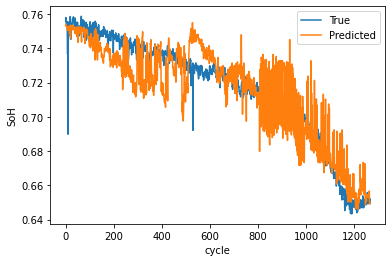

In [41]:
plt.plot(y2)
plt.plot(y_pred)
plt.xlabel('cycle')
plt.ylabel('SoH')
print('RMSE:', rmse1)
print('Percentage of RMSE:', rmspe1, '%')
print('MAE:', mae1)
plt.legend(['True','Predicted'])

In [42]:
graphs = pd.DataFrame(data = y_pred, columns = ['test2'])
graphs['test2'] = graphs['test2'] + 0.2
graphs['test22'] = y2 + 0.2
graphs.to_csv('Graphs2.csv')

## Testing 3

In [43]:
df = pd.read_csv('4ToyotaBattDatacorrected.csv')
df

,time,Qc,I,V,T,Qd,cycle,SoH
0,0.000610,0.000002,0.73053,2.1327,36.254,3.890000e-07,1,0.000002
1,0.001200,0.000002,1.06780,2.1657,36.253,3.890000e-07,1,0.000002
2,0.001822,0.000002,1.45770,2.2121,36.252,3.890000e-07,1,0.000002
3,0.002330,0.000002,1.74060,2.2488,36.251,3.890000e-07,1,0.000002
4,0.002957,0.000002,2.18940,2.3120,36.250,3.890000e-07,1,0.000002
...,...,...,...,...,...,...,...,...
805159,45691.000000,0.881030,0.00000,2.0501,38.013,8.805800e-01,1114,0.800930
805160,45691.000000,0.881030,0.00000,2.0689,38.002,8.805800e-01,1114,0.800930
805161,45691.000000,0.881030,0.00000,2.0859,37.990,8.805800e-01,1114,0.800930
805162,45691.000000,0.881030,0.00000,2.1013,37.970,8.805800e-01,1114,0.800930


In [44]:
p = []
q = []
r = []
for i in range(1114):
    dfk = df[df['cycle'] == (i+1)]
    a = np.percentile(dfk['V'],33)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= a):
            l = dfk.iloc[j,3]
            p.append(dfk.iloc[j,0])
            break
    b = np.percentile(dfk['V'],66)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= b):
            m = dfk.iloc[j,3]
            q.append(dfk.iloc[j,0])
            break
    c = np.percentile(dfk['V'],100)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= c):
            n = dfk.iloc[j,3]
            r.append(dfk.iloc[j,0])
            break

In [45]:
p = np.array(p)
q = np.array(q)
r = np.array(r)
a = r - p
b = r - q
c = q - p

In [46]:
sh = pd.DataFrame({'x':a,'y':b,'z':c})
sh

,x,y,z
0,18.59696,16.9696,1.62736
1,18.67600,17.1240,1.55200
2,18.67400,16.9550,1.71900
3,18.75000,17.1600,1.59000
4,18.76000,17.1900,1.57000
...,...,...,...
1109,8.00000,1.0000,7.00000
1110,8.00000,0.0000,8.00000
1111,7.00000,0.0000,7.00000
1112,8.00000,1.0000,7.00000


In [47]:
s = []
for i in range(1114):
    dfc = df[df['cycle'] == (i+1)]['SoH']
    k = np.mean(dfc)
    s.append(k)
shi = pd.DataFrame({'SoH':s})

In [48]:
data = pd.concat([sh, shi], axis = 1)
data

,x,y,z,SoH
0,18.59696,16.9696,1.62736,0.767620
1,18.67600,17.1240,1.55200,0.761120
2,18.67400,16.9550,1.71900,0.760625
3,18.75000,17.1600,1.59000,0.760903
4,18.76000,17.1900,1.57000,0.762860
...,...,...,...,...
1109,8.00000,1.0000,7.00000,0.655556
1110,8.00000,0.0000,8.00000,0.654725
1111,7.00000,0.0000,7.00000,0.653541
1112,8.00000,1.0000,7.00000,0.653823


In [49]:
s = []
t = []
for i in range(1114):
    dfl = df[df['cycle'] == (i+1)]
    d = np.array(dfl['T']).max()
    e = np.array(dfl['T']).min()
    s.append(d)
    t.append(e)

In [50]:
shiv = pd.DataFrame({'Tmax':s,'Tmin':t})
shiv

,Tmax,Tmin
0,39.945,32.215
1,39.696,32.053
2,39.747,32.073
3,39.618,32.103
4,40.077,32.017
...,...,...
1109,42.779,34.448
1110,42.755,34.395
1111,42.794,34.313
1112,42.699,34.212


In [51]:
data1 = pd.concat([sh, shiv, shi], axis = 1)
data1

,x,y,z,Tmax,Tmin,SoH
0,18.59696,16.9696,1.62736,39.945,32.215,0.767620
1,18.67600,17.1240,1.55200,39.696,32.053,0.761120
2,18.67400,16.9550,1.71900,39.747,32.073,0.760625
3,18.75000,17.1600,1.59000,39.618,32.103,0.760903
4,18.76000,17.1900,1.57000,40.077,32.017,0.762860
...,...,...,...,...,...,...
1109,8.00000,1.0000,7.00000,42.779,34.448,0.655556
1110,8.00000,0.0000,8.00000,42.755,34.395,0.654725
1111,7.00000,0.0000,7.00000,42.794,34.313,0.653541
1112,8.00000,1.0000,7.00000,42.699,34.212,0.653823


In [52]:
# Separate Target Variable and Predictor Variables
TargetVariable = ['SoH']
Predictors = ['x', 'y', 'z', 'Tmax', 'Tmin']
 
X3 = data1[Predictors].values
y3 = data1[TargetVariable].values
 
### Sandardization of data ###
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
  
# Generating the standardized values of X and y
X3=Scaler.fit_transform(X3)
y3=Scaler.fit_transform(y3)
X3 = X3.reshape(1114, 1, 5)

In [53]:
# Evaluate the model
score = model.evaluate(X3, y3, batch_size=16)
print('Test loss:', score)

70/70 [==============================] - 0s 760us/step - loss: 0.0948
Test loss: 0.09476194530725479


In [54]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X3)
y_pred = Scaler.inverse_transform(y_pred)
y3 = Scaler.inverse_transform(y3)


# Calculate the RMSE
rmse3 = np.sqrt(mean_squared_error(y3, y_pred))

# Calculate the percentage of RMSE
rmspe3 = np.sqrt(np.mean(np.square(((y3 - y_pred) / y3)), axis=0))
# Print the results
print('RMSE:', rmse3)
print('Percentage of RMSE:', rmspe3, '%')
from sklearn.metrics import mean_absolute_error
mae3 = mean_absolute_error(y3, y_pred)
print('MAE:', mae3)

35/35 [==============================] - 0s 805us/step
RMSE: 0.00840785921673277
Percentage of RMSE: [0.01189792] %
MAE: 0.0059766696141349065


RMSE: 0.00840785921673277
Percentage of RMSE: [0.01189792] %
MAE: 0.0059766696141349065


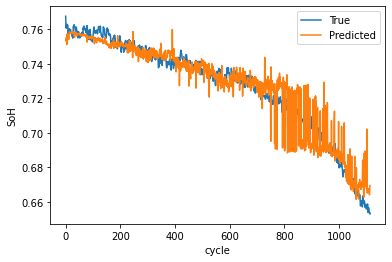

In [55]:
plt.plot(y3)
plt.plot(y_pred)
plt.xlabel('cycle')
plt.ylabel('SoH')
print('RMSE:', rmse3)
print('Percentage of RMSE:', rmspe3, '%')
print('MAE:', mae3)
plt.legend(['True','Predicted'])

In [56]:
graphs = pd.DataFrame(data = y_pred, columns = ['test3'])
graphs['test3'] = graphs['test3'] + 0.2
graphs['test33'] = y3 + 0.2
graphs.to_csv('Graphs3.csv')

## Testing 4

In [57]:
df = pd.read_csv('1ToyotaBattDatacorrected.csv')
df

,time,Qc,I,V,T,Qd,cycle,SoH
0,0.000000,0.000004,0.54276,2.1233,32.083,6.000000e-07,1,0.000004
1,0.000597,0.000004,0.84863,2.1515,32.083,6.000000e-07,1,0.000004
2,0.001162,0.000004,1.20010,2.1924,32.082,6.000000e-07,1,0.000004
3,0.001827,0.000004,1.55060,2.2395,32.082,6.000000e-07,1,0.000004
4,0.002372,0.000004,1.85020,2.2834,32.082,6.000000e-07,1,0.000004
...,...,...,...,...,...,...,...,...
739219,42972.000000,0.881640,0.00000,2.0308,32.964,8.804300e-01,1008,0.801490
739220,42972.000000,0.881640,0.00000,2.0538,32.964,8.804300e-01,1008,0.801490
739221,42972.000000,0.881640,0.00000,2.0740,32.964,8.804300e-01,1008,0.801490
739222,42972.000000,0.881640,0.00000,2.0921,32.974,8.804300e-01,1008,0.801490


In [58]:
p = []
q = []
r = []
for i in range(1008):
    dfk = df[df['cycle'] == (i+1)]
    a = np.percentile(dfk['V'],33)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= a):
            l = dfk.iloc[j,3]
            p.append(dfk.iloc[j,0])
            break
    b = np.percentile(dfk['V'],66)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= b):
            m = dfk.iloc[j,3]
            q.append(dfk.iloc[j,0])
            break
    c = np.percentile(dfk['V'],100)
    for j in range(len(dfk)):
        if(dfk.iloc[j,3] >= c):
            n = dfk.iloc[j,3]
            r.append(dfk.iloc[j,0])
            break

In [59]:
p = np.array(p)
q = np.array(q)
r = np.array(r)
a = r - p
b = r - q
c = q - p

In [60]:
sh = pd.DataFrame({'x':a,'y':b,'z':c})
sh

,x,y,z
0,18.66887,16.2608,2.40807
1,18.75300,16.5190,2.23400
2,18.83200,16.5680,2.26400
3,18.84000,16.6200,2.22000
4,18.90000,16.7800,2.12000
...,...,...,...
1003,18.00000,12.0000,6.00000
1004,8.00000,2.0000,6.00000
1005,6.00000,0.0000,6.00000
1006,7.00000,1.0000,6.00000


In [61]:
s = []
for i in range(1008):
    dfc = df[df['cycle'] == (i+1)]['SoH']
    k = np.mean(dfc)
    s.append(k)
shi = pd.DataFrame({'SoH':s})

In [62]:
data = pd.concat([sh, shi], axis = 1)
data

,x,y,z,SoH
0,18.66887,16.2608,2.40807,0.774642
1,18.75300,16.5190,2.23400,0.773713
2,18.83200,16.5680,2.26400,0.773076
3,18.84000,16.6200,2.22000,0.773143
4,18.90000,16.7800,2.12000,0.772612
...,...,...,...,...
1003,18.00000,12.0000,6.00000,0.655975
1004,8.00000,2.0000,6.00000,0.654306
1005,6.00000,0.0000,6.00000,0.652531
1006,7.00000,1.0000,6.00000,0.652455


In [63]:
s = []
t = []
for i in range(1008):
    dfl = df[df['cycle'] == (i+1)]
    d = np.array(dfl['T']).max()
    e = np.array(dfl['T']).min()
    s.append(d)
    t.append(e)

In [64]:
shiv = pd.DataFrame({'Tmax':s,'Tmin':t})
shiv

,Tmax,Tmin
0,33.434,30.830
1,33.404,30.780
2,33.325,30.825
3,33.304,30.805
4,33.257,30.792
...,...,...
1003,34.830,31.565
1004,34.780,31.424
1005,34.779,31.383
1006,34.766,31.437


In [65]:
data1 = pd.concat([sh, shiv, shi], axis = 1)
data1

,x,y,z,Tmax,Tmin,SoH
0,18.66887,16.2608,2.40807,33.434,30.830,0.774642
1,18.75300,16.5190,2.23400,33.404,30.780,0.773713
2,18.83200,16.5680,2.26400,33.325,30.825,0.773076
3,18.84000,16.6200,2.22000,33.304,30.805,0.773143
4,18.90000,16.7800,2.12000,33.257,30.792,0.772612
...,...,...,...,...,...,...
1003,18.00000,12.0000,6.00000,34.830,31.565,0.655975
1004,8.00000,2.0000,6.00000,34.780,31.424,0.654306
1005,6.00000,0.0000,6.00000,34.779,31.383,0.652531
1006,7.00000,1.0000,6.00000,34.766,31.437,0.652455


In [66]:
# Separate Target Variable and Predictor Variables
TargetVariable = ['SoH']
Predictors = ['x', 'y', 'z', 'Tmax', 'Tmin']
 
X4 = data1[Predictors].values
y4 = data1[TargetVariable].values
 
### Sandardization of data ###
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
  
# Generating the standardized values of X and y
X4=Scaler.fit_transform(X4)
y4=Scaler.fit_transform(y4)
X4 = X4.reshape(1008, 1, 5)

In [67]:
# Evaluate the model
score = model.evaluate(X3, y3, batch_size=16)
print('Test loss:', score)

70/70 [==============================] - 0s 874us/step - loss: 1.4090
Test loss: 1.40897536277771


In [68]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X4)
y_pred = Scaler.inverse_transform(y_pred)
y4 = Scaler.inverse_transform(y4)


# Calculate the RMSE
rmse4 = np.sqrt(mean_squared_error(y4, y_pred))

# Calculate the percentage of RMSE
rmspe4 = np.sqrt(np.mean(np.square(((y4 - y_pred) / y4)), axis=0))
# Print the results
print('RMSE:', rmse4)
print('Percentage of RMSE:', rmspe4, '%')
from sklearn.metrics import mean_absolute_error
mae4 = mean_absolute_error(y4, y_pred)
print('MAE:', mae4)

32/32 [==============================] - 0s 809us/step
RMSE: 0.011732230969392124
Percentage of RMSE: [0.01675607] %
MAE: 0.007719078368317924


RMSE: 0.011732230969392124
Percentage of RMSE: [0.01675607] %
MAE: 0.007719078368317924


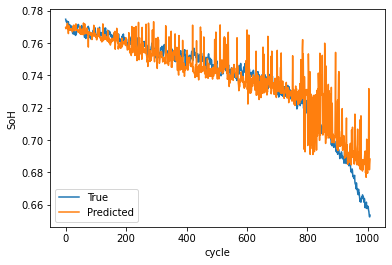

In [69]:
plt.plot(y4)
plt.plot(y_pred)
plt.xlabel('cycle')
plt.ylabel('SoH')
print('RMSE:', rmse4)
print('Percentage of RMSE:', rmspe4, '%')
print('MAE:', mae4)
plt.legend(['True','Predicted'])

In [70]:
graphs = pd.DataFrame(data = y_pred, columns = ['test4'])
graphs['test4'] = graphs['test4'] + 0.2
graphs['test44'] = y4 + 0.2
graphs.to_csv('Graphs4.csv')

In [71]:
'''# Input data
V = [01, 02, ..., Up] # Charging voltage data
t = [41, 12, ..., tp] # Time data in charging cycle

# Calculate percentiles
Up_33 = np.percentile(V, 33)
Up_67 = np.percentile(V, 67)
Up_99 = np.percentile(V, 99)

# Find time intervals
for i in range(len(V)):
    if V[i] > Up_33:
        tp_33 = t[i]
        break
    
for j in range(i, len(V)):
    if V[j] > Up_67:
        tp_67 = t[j]
        break
        
for k in range(j, len(V)):
    if V[k] > Up_99:
        tp_99 = t[k]
        break
#Output        
tv_12 = tp_67 - tp_33
tv_13 = tp_99 - tp_33
tv_23 = tp_99 - tp_67'''

'# Input data\nV = [01, 02, ..., Up] # Charging voltage data\nt = [41, 12, ..., tp] # Time data in charging cycle\n\n# Calculate percentiles\nUp_33 = np.percentile(V, 33)\nUp_67 = np.percentile(V, 67)\nUp_99 = np.percentile(V, 99)\n\n# Find time intervals\nfor i in range(len(V)):\n    if V[i] > Up_33:\n        tp_33 = t[i]\n        break\n    \nfor j in range(i, len(V)):\n    if V[j] > Up_67:\n        tp_67 = t[j]\n        break\n        \nfor k in range(j, len(V)):\n    if V[k] > Up_99:\n        tp_99 = t[k]\n        break\n#Output        \ntv_12 = tp_67 - tp_33\ntv_13 = tp_99 - tp_33\ntv_23 = tp_99 - tp_67'